# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os
src_dir = os.path.join(os.getcwd(), '..')
sys.path.append(src_dir)

In [3]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [4]:
from src.data.make_dataset import load_raw_train
from src.features.build_features import transform_columns
from src.visualization.visualize import plot_bar_for_categorical
from src.visualization.visualize import plot_hist_for_numerical

# Load data

In [5]:
df = load_raw_train()
df.shape # rows and columns

(8693, 14)

In [6]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


## Data exploration

### Duplicated values

In [7]:
df.duplicated().sum()

0

There are no duplicates in data.

### Class balance

In [5]:
df['Transported'].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

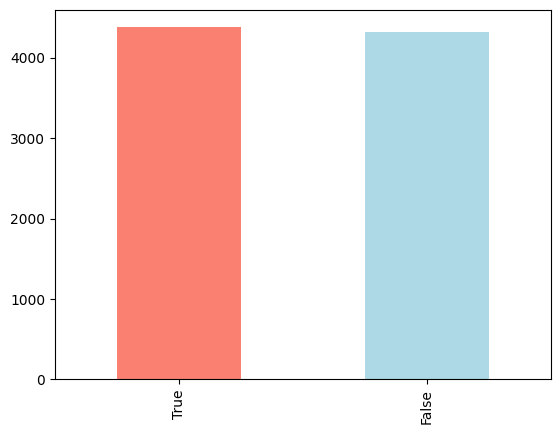

In [6]:
df["Transported"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Classes are balanced.

### Checking missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

No missing values in `Transported` column, which is good.

## Column transformations

Create following columns:
* `GroupNumber` from `PassengerId`
* `GroupSize` from number of occurrences of `GroupNumber`
* `Deck` from `Cabin`
* `Side` from `Cabin`

Drop following columns:
* `PassengerId`
* `Cabin`
* `Name`

In [120]:
df = transform_columns(df)
df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNumber,GroupSize,Deck,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,F,S


## Continuing data exploration

### Distribution of categorical data

In [121]:
df['GroupSize'].value_counts()

1    4805
2    1682
3    1020
4     412
5     265
7     231
6     174
8     104
Name: GroupSize, dtype: int64

In [122]:
df['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

Both `GroupSize` and `Deck` columns have 8 possible values that are spread unevenly.

In [108]:
df['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

`Side` column has 2 different possible values that are spread evenly.

### Creating bar plots visualizing frequency of each category

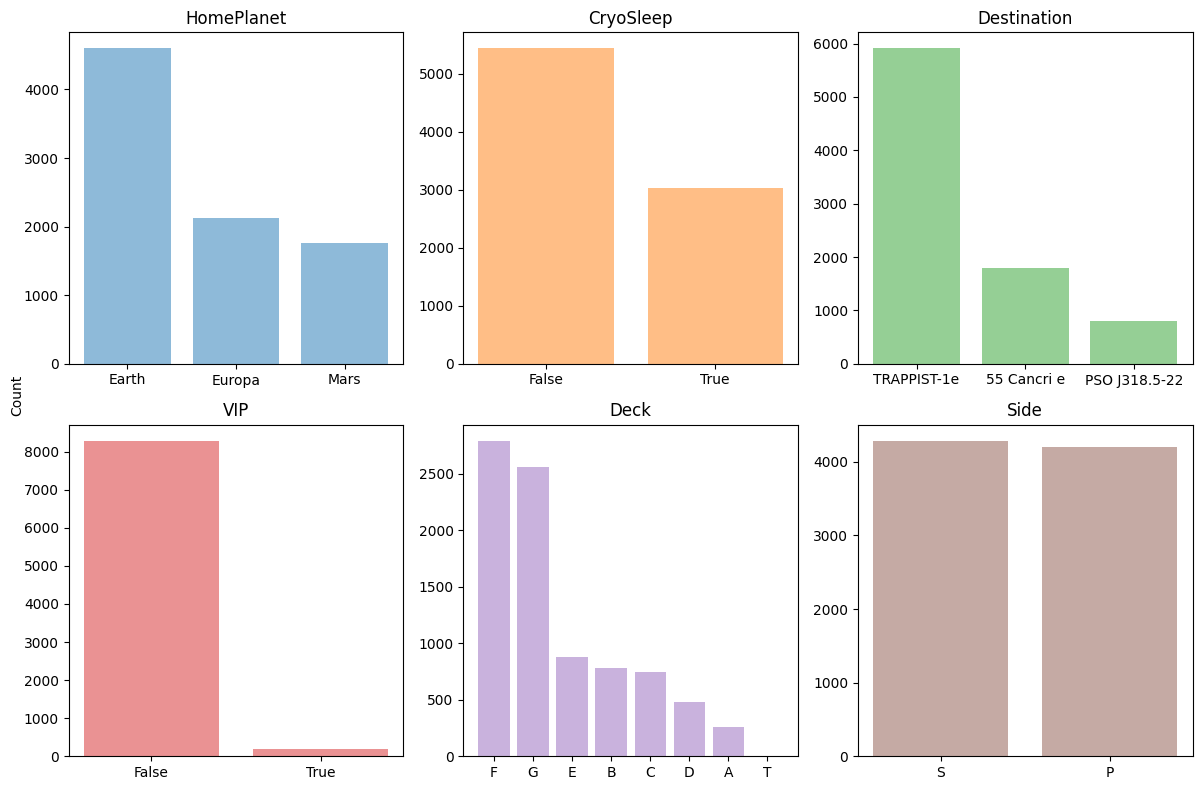

In [139]:
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
plot_bar_for_categorical(df, categorical_features)

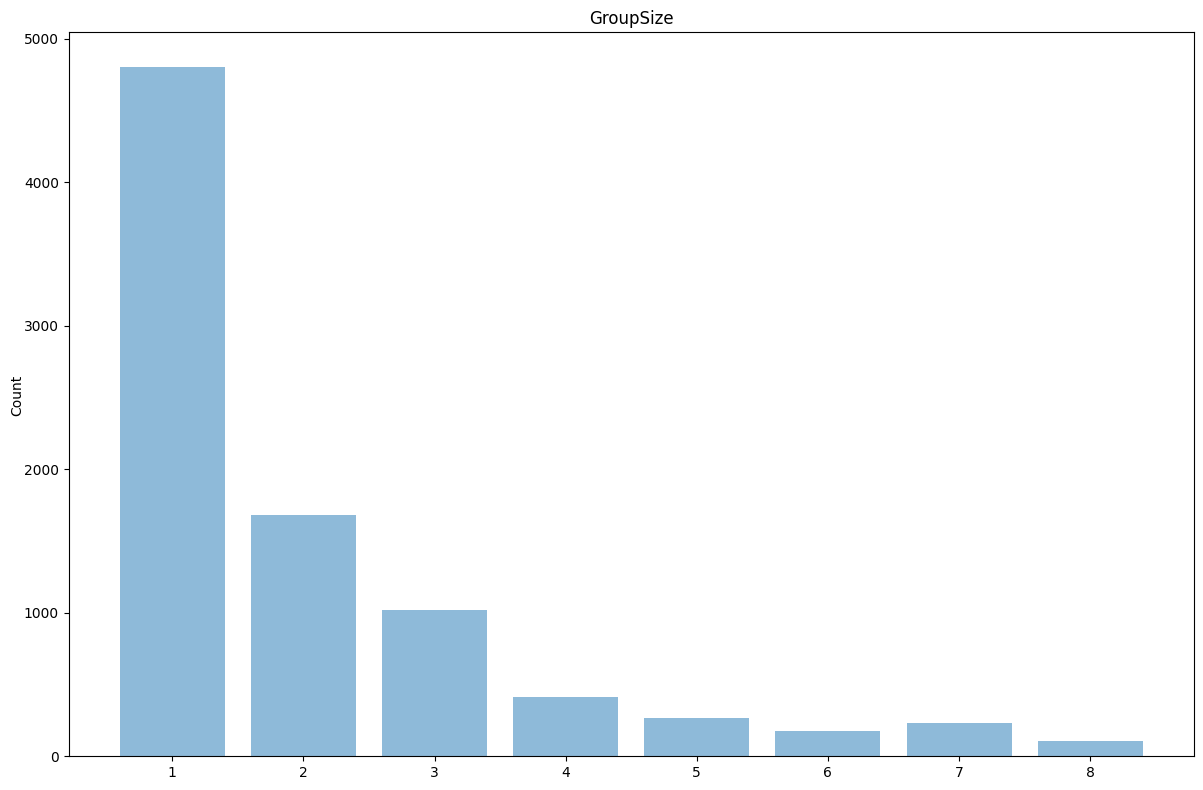

In [138]:
plot_bar_for_categorical(df, ['GroupSize'])

Looking at VIP plot, small amount of people decided to be a VIP.

Same applies to people staying at deck T as well as people travelling in larger groups (>3).

In [140]:
df['GroupNumber'].value_counts()

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: GroupNumber, Length: 6217, dtype: int64

`GroupNumber` is a tricky category since it has over 6000 different posiible values. Despite that it is providing valuable information.

### Visualizing missing data

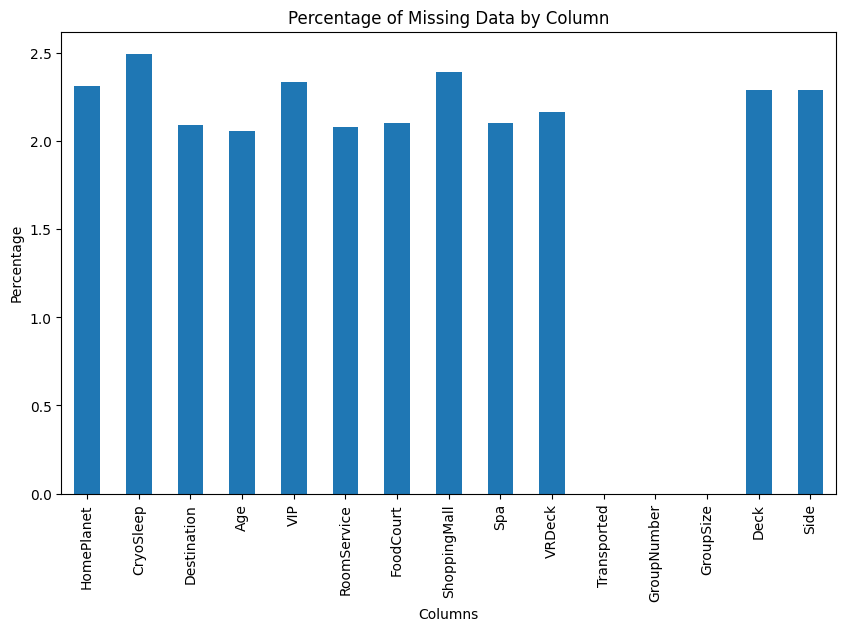

In [141]:
# Take missing data, mean it and transform into percentage
missing_data_percentage = df.isnull().mean() * 100
missing_data_percentage.plot(kind='bar', figsize=(10, 6))

# Set title, x label and y label.
plt.title('Percentage of Missing Data by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

There is no column that has lots of missing data, that is good.

### Numerical data

Basic statistics of numerical data

In [142]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupSize
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,2.035546
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,1.596347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,3.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000


* `Age` starts at 0 and ends on 79.
* Not a lot of people paid for `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` and `VRDeck`.

### Histograms

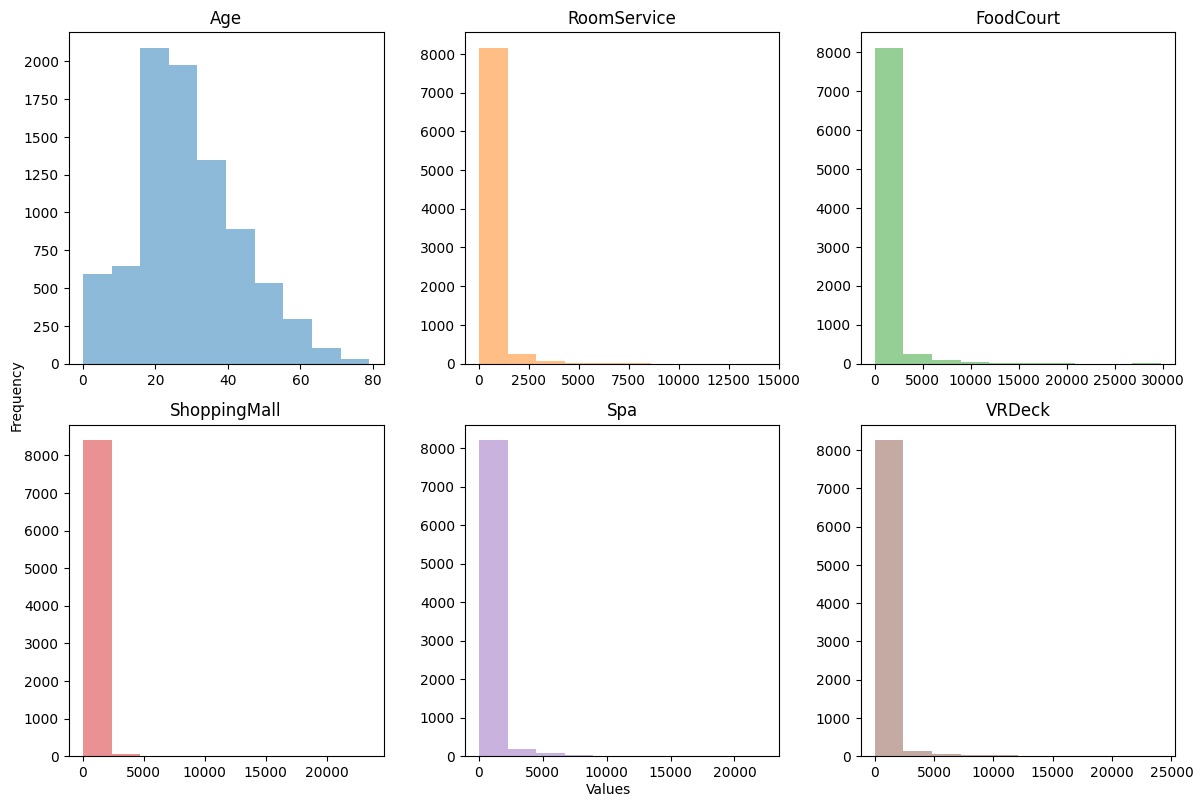

In [144]:
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plot_hist_for_numerical(df, numerical_features)

It is looking like there are some outliers. Boxplots will allow for better view of the outliers.

### Boxplots for numeric data

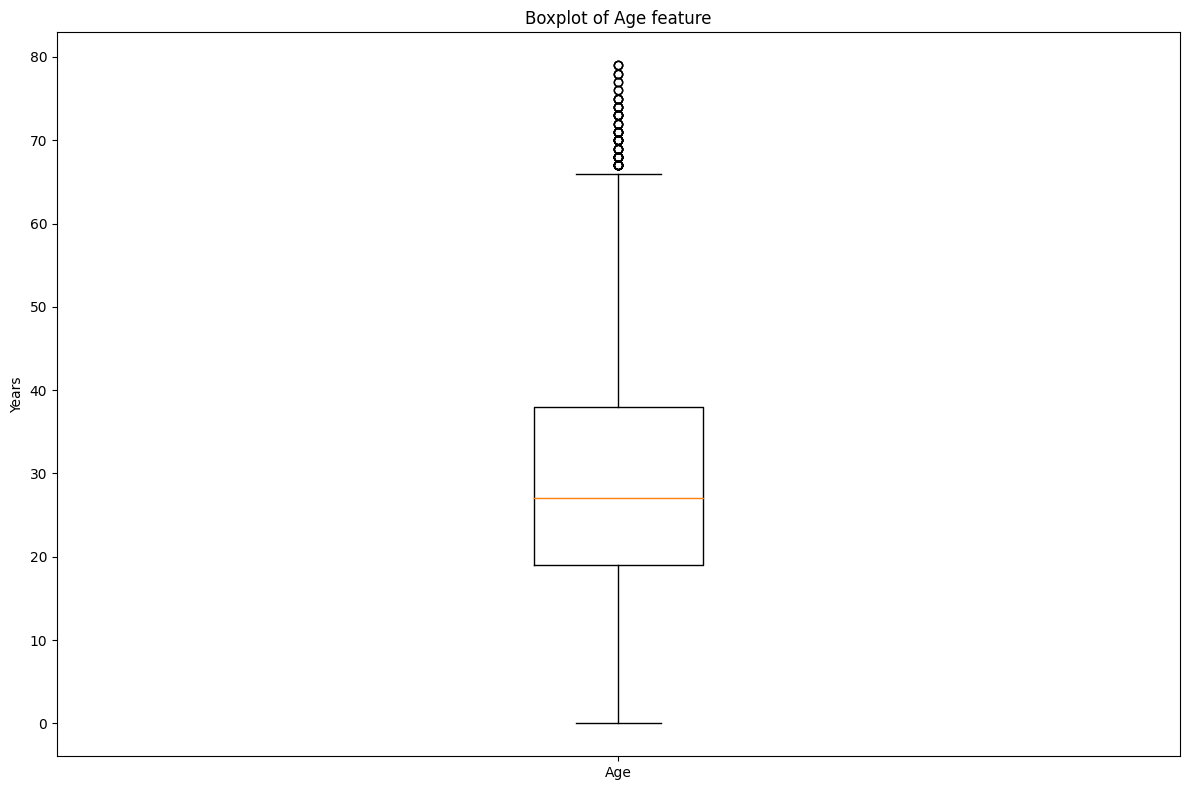

In [145]:
fig, ax = plt.subplots(figsize=(12, 8))

# Create boxplot of Age without missing values that normally would be in Age column
ax.boxplot(df[df['Age'].notnull()]['Age'])
ax.set_xticklabels(['Age']) # Set x label
ax.set(title="Boxplot of Age feature", ylabel="Years") # Set title and label
plt.tight_layout()  # Adjust the spacing between subplots

plt.show()  # Display the figure

Looks like `Age` column is spread out as expected.

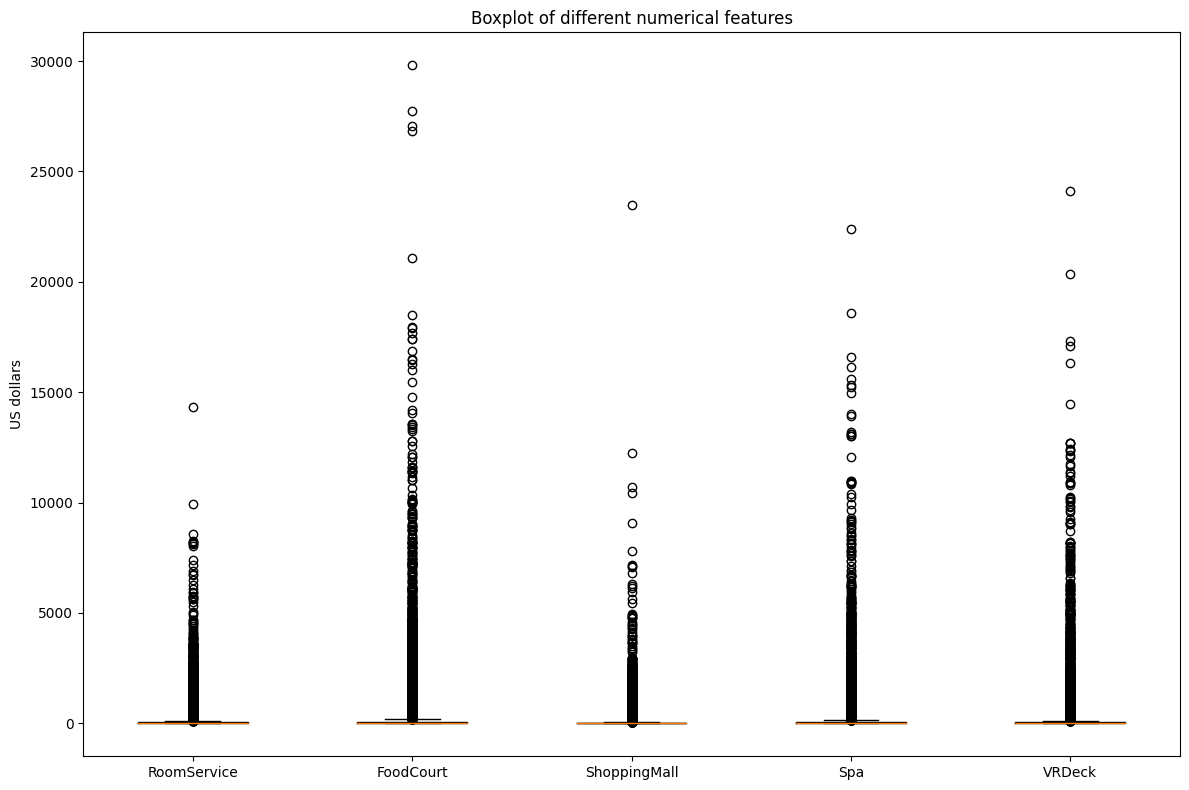

In [146]:
fig, ax = plt.subplots(figsize=(12, 8))

# Create boxplots on one figure of different numerical features (excluding missing values)
ax.boxplot([df[df['RoomService'].notnull()]['RoomService'], 
            df[df['FoodCourt'].notnull()]['FoodCourt'], 
            df[df['ShoppingMall'].notnull()]['ShoppingMall'], 
            df[df['Spa'].notnull()]['Spa'], 
            df[df['VRDeck'].notnull()]['VRDeck']])

# Set titles and labels
ax.set(title="Boxplot of different numerical features", ylabel="US dollars")
ax.set_xticklabels(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()  # Display the figure

There are a lot of outliers. This will have an impact later on, for example when choosing normalizers.

### Save transformed data

In [147]:
df.to_csv("../data/interim/train_transformed.csv", index=False)